# Laplace Transforms

- Submitted 12/10/17 by Colton Grainger for MATH 310-10: Ordinary Differential Equations, Engineering Outreach
- Text: *Differential Equations and Boundary Value Problems: Computing and Modeling* by C. Henry Edwards, David E. Penney and David Calvis, 5th Edition, Prentice Hall

## &sect; 7.1 Laplace Transform Methods

We're using the definition of the Laplace Transform, given a function $f(t)$ defined on $[0, \infty)$, 

$$
F(s) = \mathcal{L}\{f(t)\} = \int_0^\infty e^{-st}f(t)\, dt,
$$
for all values of $s$ for which the improper integral converges.

To ensure convergence, I'll call 

    assume( s > a )

so that Maxima knows how $s$ behaves while integrating out $t$.
### Prob 1

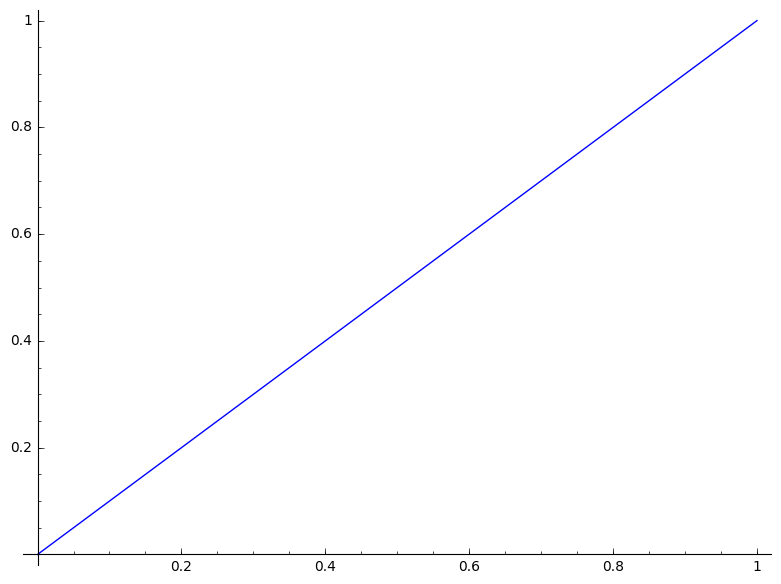

In [35]:
var("t")
f(t) = t
plot(f, (t, 0, 1))

In [36]:
var("s") 
assume( s>0 )
F(s) = integral( f(t)*exp(-s*t), t, 0, oo )
show(F)

s |--> s^(-2)

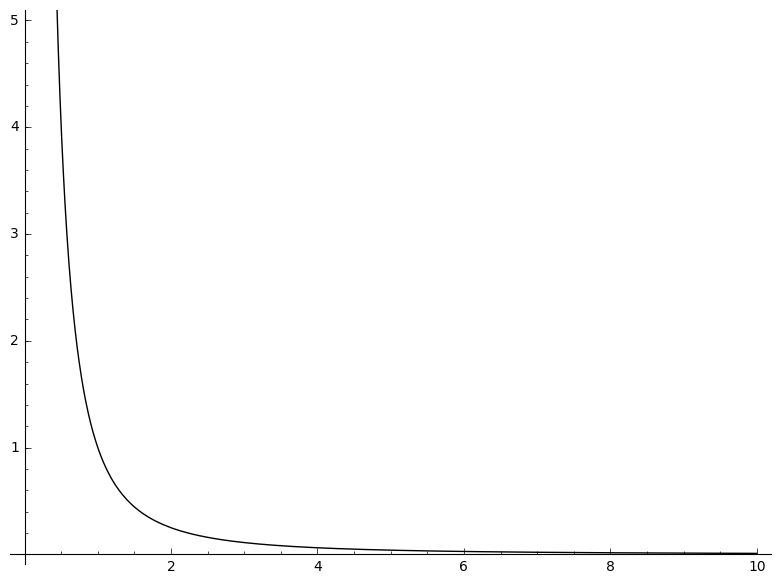

In [3]:
plot(F, (s, 0, 10), ymax = 5, color = 'black')

## Prob 4

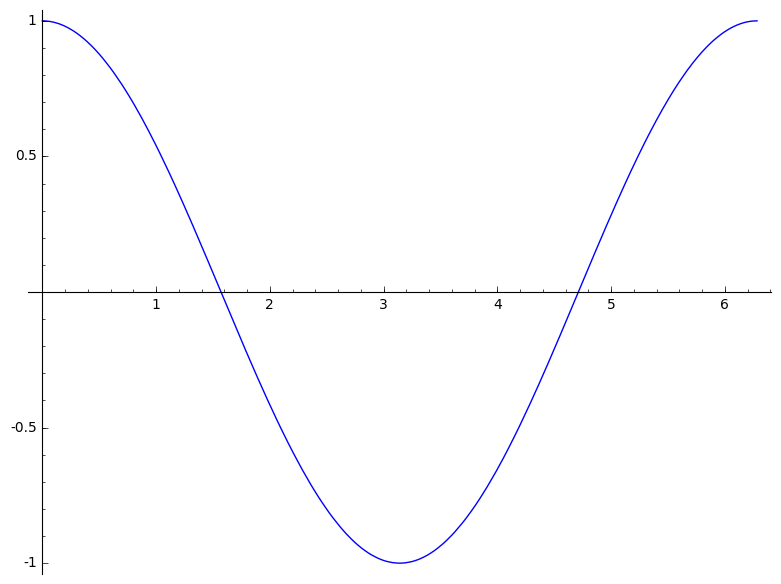

In [4]:
f(t) = cos(t)
plot(f, (t,0,2*pi))

In [5]:
assume( s>0 )
F(s) = integral( f(t)*exp(-s*t), t, 0, oo )
show(F)

s |--> s/(s^2 + 1)

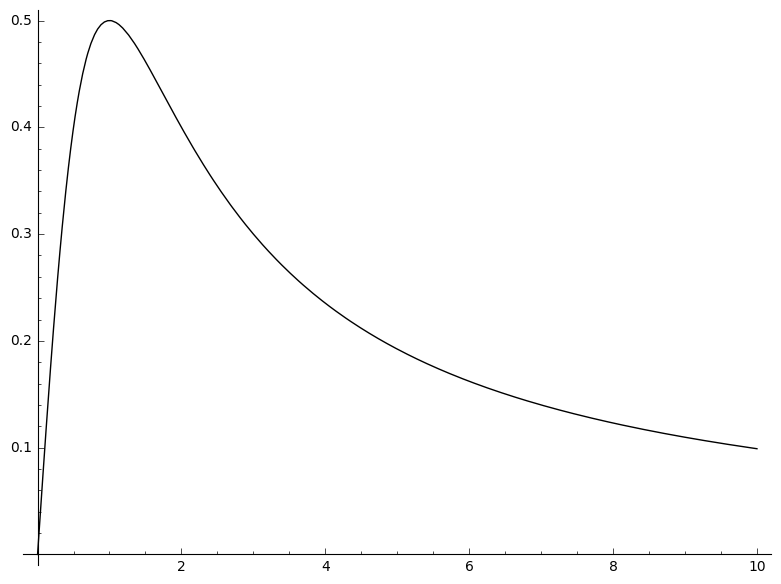

In [6]:
plot(F, (s, 0, 10), color = 'black')

## Prob 9

In this question I use `unit_step`, a [generalized function](https://en.wikipedia.org/wiki/Generalized_function) defined in [Maxima](https://ask.sagemath.org/question/8041/how-can-i-integrate-the-dirac_delta-and-heaviside-functions-in-sage/?answer=37536#post-id-37536) for symbolic calculation.

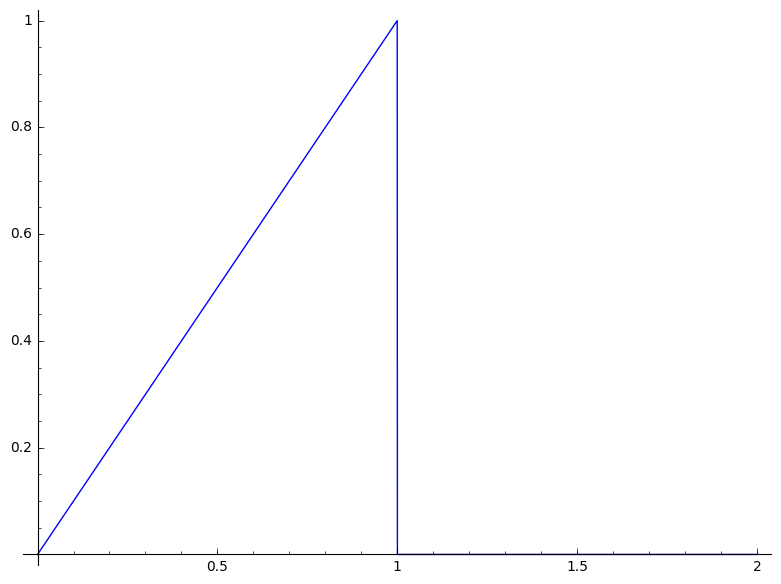

In [7]:
f(t) = t*(1-unit_step(t-1))
plot(f, (t,0,2))

In [8]:
F(s) = integral( f(t)*exp(-s*t), t, 0, oo)
show(F)

s |--> -e^(-s)/s - e^(-s)/s^2 + 1/s^2

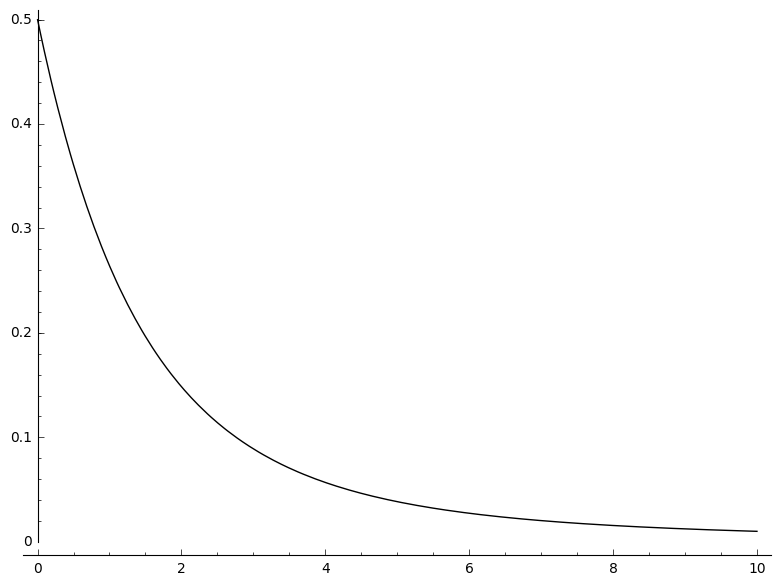

In [9]:
plot(F, (s, 0, 10), color = 'black')

### Prob 11

We have a factor of $\sqrt{\pi}$ from $\Gamma(n+1/2)$, where $n = 1$ in this case.

In [11]:
f(t) = sqrt(t) + 3*t
F(s) = integral( f(t)*e^(-s*t), t, 0, oo)
show(F)

s |--> 1/2*(sqrt(pi)*s + 6*sqrt(s))/s^(5/2)

### Prob 13

This problem can also be tackled with a result about translation on the $s$-axis.

- If $F(s) = \mathcal{L}\{f(t)\}$ exists for $s > c$, then $\mathcal{L}\{e^{at}f(t)\}$ exists for $s > a + c$, and $\mathcal{L}\{e^{at}f(t)\} = F(s-a).$

In [12]:
f(t) = t - 2*e^(3*t)
assume( s>3 )
F(s) = integral( f(t)*e^(-s*t), t, 0, oo)
show(F.partial_fraction(s))

s |--> -2/(s - 3) + 1/s^2

### Prob 15

In [14]:
f(t) = 1 + cosh(5*t)
F(s) = laplace(f, t, s)
show(F)

s |--> s/(s^2 - 25) + 1/s

In [15]:
# here's another way to see hyperbolic cosine as the sum of exponential functions
show(F.partial_fraction(s))

s |--> 1/2/(s + 5) + 1/2/(s - 5) + 1/s

### Prob 17

In [16]:
f(t) = (cos(2*t))^2
assume( s > 0 )
F(s) = integral( f(t)*e^(-s*t), t, 0, oo)
show(F.partial_fraction(s))

s |--> 1/2*s/(s^2 + 16) + 1/2/s

Another way to compute this integral: use Euler's identity and properties of the exponential function to show 
$\cos^2(2t) = \frac12\cdot(1 - \cos(4t))$.

In [17]:
#whence
F(s) = (1/2)*(laplace(1, t, s) + laplace(cos(4*t), t, s))
show(F)

s |--> 1/2*s/(s^2 + 16) + 1/2/s

### Prob 21

One could also integrate by parts.

In [18]:
f(t) = t*cos(2*t)
assume( s > 0 )
F(s) = integral( f(t)*e^(-s*t), t, 0, oo)
show(F.partial_fraction(s))

s |--> 1/(s^2 + 4) - 8/(s^2 + 4)^2

## Inverse Laplace Transforms

In general, every rational function is a Laplace transform iff (?) the degree of its numerator is less than that of its demoninator. We can identify inverse transforms by exploiting the linearity of the Laplace transform, and breaking down rational functions into sums of recognizable transforms 
- $\mathcal{L}\{t^a\}$ for $a > -1$
- $\mathcal{L}\{e^{at}\}$ for $a \in \mathbf{R}$
- $\mathcal{L}\{\cos(kt)\}$ (also cosh, sin, sinh)
- transforms of step functions

Again, linearity helps.

### Prob 23

$$ \mathcal{L}^{-1}\left\{\frac3{s^4}\right\} 
= \frac{3}{\Gamma(4)}\mathcal{L}^{-1}\left\{\frac{\Gamma(4)}{s^4}\right\} 
= \frac12 t^3. $$

Here's the computational method.

In [21]:
F(s) = 3/s^4
f(t) = inverse_laplace(F(s), s, t)
show(f)

t |--> 1/2*t^3

### Prob 25

Fortunately, `SAGE` doesn't have a dictionary of inverse transforms for non-integer powers, so we get to manipulate the [Gamma function](https://en.wikipedia.org/wiki/Gamma_function) a bit.

$$
\mathcal{L}^{-1}\left\{\frac1s - \frac2{s^{5/2}}\right\} 
= 1 - \frac2{\Gamma(5/2)}\mathcal{L}^{-1}\left\{\frac{\Gamma(5/2)}{s^{5/2}}\right\}
= 1 - \frac{8 t^{3/2}}{3\sqrt{\pi}}.
$$

### Prob 27

In [22]:
F(s) = 3/(s-4)
f(t) = inverse_laplace(F(s), s, t)
show(f)

t |--> 3*e^(4*t)

### Prob 29

In [23]:
F(s) = (5-3*s)/(s^2 + 9)
f(t) = inverse_laplace(F(s), s, t)
show(f)

t |--> -3*cos(3*t) + 5/3*sin(3*t)

### Prob 31

In [24]:
F(s) = (10*s-3)/(25-s^2)
f(t) = inverse_laplace(F(s), s, t)
show(f)

t |--> -47/10*e^(5*t) - 53/10*e^(-5*t)

In [39]:
# equivalently
f(t) = -10*cosh(5*t) + (3/5)*sinh(5*t)
show(f)

t |--> -10*cosh(5*t) + 3/5*sinh(5*t)

## &sect; 7.2 Transformation of Initial Value Problems

We proceed with a result on the transforms of derivatives.

- Suppose the function $f(t)$ is continuous and piecewise smooth for $t \geq 0$ and is of exponential order as $t \to \infty$ (so there exist $M$, $c$, and $T$ such that $|f(t)| \leq Me^{ct}$ for $t \geq T$). Then $\mathcal{L}\{f'(t)\}$ exists for $s > c$ and 

$$
\mathcal{L}\{f'(t)\} = s\mathcal{L}\{f(t)\} - f(0) = sF(s) - f(0).
$$

- Then express higher derivatives by repeating the calculation. Notably,

$$
\mathcal{L}\{f''(t)\} = s\mathcal{L}\{f'(t)\} - f'(0) = s^2F(s) - s\,f(0) - f'(0).
$$

### Prob 1

Either solve by hand or call `desolve_laplace`, which takes 3 arguments:
- a linear differential equation in $x(t)$
- the "dependent variable" $x$ (where $x$ is really a function)
- initial conditions $t_0$, $x(t_0)$, and $x'(t_0)$

t |--> 5*cos(2*t)

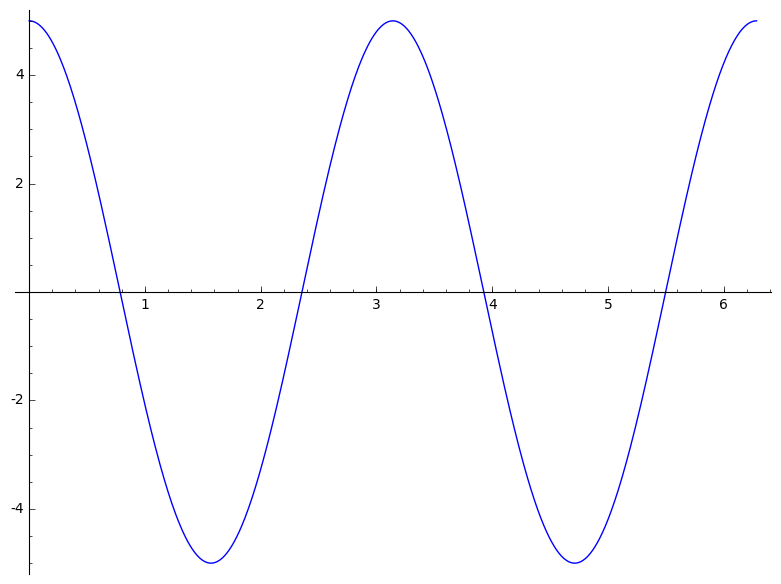

In [56]:
x=function('x')(t)
x(t) = desolve_laplace(diff(x,t,2) + 4*x(t) == 0, dvar = x, ics = [0,5,0])
show(x)
plot(x(t), (t, 0, 2*pi))

### Prob 3

t |--> 2/3*e^(2*t) - 2/3*e^(-t)

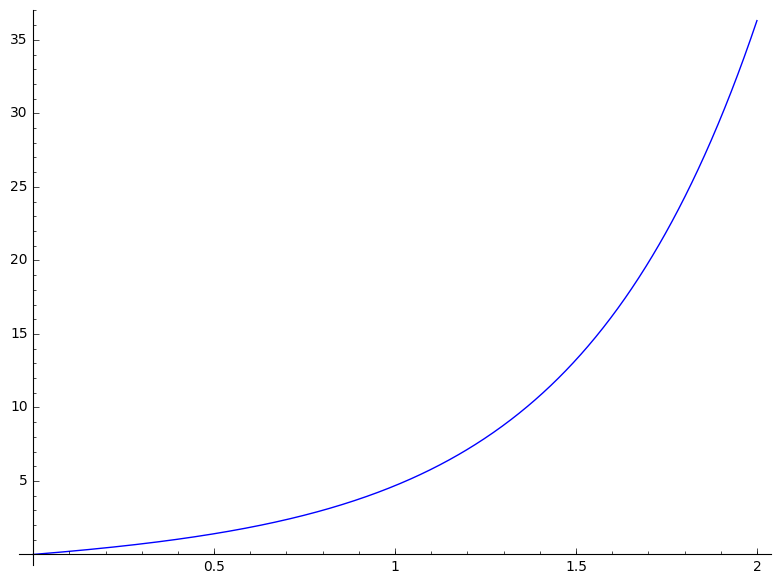

In [58]:
x=function('x')(t)
x(t) = desolve_laplace(diff(x,t,2) - diff(x,t) - 2*x(t) == 0, dvar = x, ics = [0,0,2])
show(x)
plot(x(t), (t, 0, 2))

### Prob 5

t |--> -1/3*sin(2*t) + 2/3*sin(t)

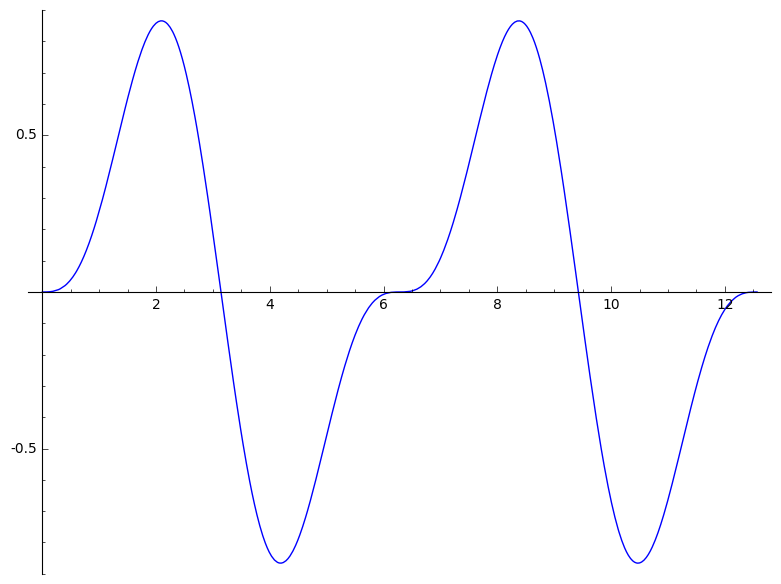

In [60]:
x=function('x')(t)
x(t) = desolve_laplace(diff(x,t,2) + x(t) == sin(2*t), dvar = x, ics = [0,0,0])
show(x)
plot(x(t), (t, 0, 4*pi))

### Prob 17

In [67]:
F(s) = 1/(s*(s-3))
show(F.partial_fraction(s))
f(t) = inverse_laplace(F, s, t)
show(f)

s |--> 1/3/(s - 3) - 1/3/s

t |--> 1/3*e^(3*t) - 1/3